In [129]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import tensorflow as tf
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [130]:
# Load the VGG19 model
# https://keras.io/api/applications/vgg/#vgg19-function
model = VGG19(include_top=True, weights='imagenet')

In [131]:
# Define default image size for VGG19
image_size = (224, 224)

In [132]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [133]:
# Make predictions
predictions = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [19]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model` is already defined as a VGG19 model
model = VGG19(weights="imagenet")

def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=(224, 224))  # VGG19 requires 224x224 images
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    x = preprocess_input(x)  # Apply VGG19 preprocessing

    # Run prediction
    preds = model.predict(x)
    
    # Decode predictions to get readable labels
    decoded_preds = decode_predictions(preds, top=3)[0]  # Extract top 3 predictions
    
    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    print("Predicted:")
    for pred in decoded_preds:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")  # Label and probability in percentage
    
    return decoded_preds  # Return readable labels instead of raw numbers


In [ ]:
# Loop through the files to create a dataframe of their image names
def select_jpgs(folder_path):

    jpg_files = glob.glob(os.path.join(folder_path, "*.jpg"))
    return pd.Series(jpg_files)

# folder path:
folder_path = "./Training_2000_Fixed/"
jpg_series = select_jpgs(folder_path)

for jpg_file in jpg_series:
    print(f"Processing: {jpg_file}")

In [ ]:
# Load your trained model
model = VGG19(weights="imagenet")

# Define image directory
image_dir = "./Training_2000_Fixed/"
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Create an empty list to store results
results = []

# Process each image
for img_path in image_paths:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get predictions
    preds = model.predict(img_array)

    # Decode predictions to get readable labels
    decoded_preds = decode_predictions(preds, top=3)[0]  # Extract top 3 predictions
        
    # Extract top 3 predictions
    top_3_predictions = [decoded_preds[i][1] for i in range(3)]  # Class labels
    top_3_confidences = [decoded_preds[i][2] for i in range(3)]  # Confidence scores
    
    # Store results
    results.append([img_path] + top_3_predictions + top_3_confidences)

# Create DataFrame
df = pd.DataFrame(results, columns=["file_path", "predict_1", "predict_2", "predict_3", "conf_1", "conf_2", "conf_3"])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [34]:
df

file_path      predict_1  \
0     ./Training_2000_Fixed/000a8769fc78487a9163852d...    bell_pepper   
1     ./Training_2000_Fixed/000aaacc53f94d708736b845...          cliff   
2     ./Training_2000_Fixed/000c403fd07740e3aef76244...         tripod   
3     ./Training_2000_Fixed/000c4ee98dfa437195b2b688...   sleeping_bag   
4     ./Training_2000_Fixed/000fe90b4fb14fca9d250167...           mask   
...                                                 ...            ...   
1995  ./Training_2000_Fixed/0fb52fe6a4b34f15ba0c2a59...            alp   
1996  ./Training_2000_Fixed/0fb59e9aa0784b4a8dd2de6a...       notebook   
1997  ./Training_2000_Fixed/0fb6c3a6237141a2aa821a54...  mountain_bike   
1998  ./Training_2000_Fixed/0fb9e5d2410249638da32f54...          stole   
1999  ./Training_2000_Fixed/0fb9ea43aef44ba38f0ee9e8...            wig   

             predict_2        predict_3    conf_1    conf_2    conf_3  
0     spaghetti_squash         cucumber  0.205456  0.160366  0.159481  
1              snorkel        parachute  0.408890  0.282890  0.033447  
2        reflex_camera  Polaroid_camera  0.903250  0.090655  0.002598  
3               throne            cloak  0.220898  0.060522  0.050951  
4              gasmask      oxygen_mask  0.480151  0.340098  0.044349  
...                ...              ...       ...       ...       ...  
1995            valley            cliff  0.623874  0.162927  0.140580  
1996               wig           laptop  0.421486  0.281019  0.022985  
1997          unicycle          panpipe  0.513792  0.181675  0.062217  
1998              wool         cardigan  0.341756  0.272374  0.133544  
1999          lipstick        miniskirt  0.211425  0.116270  0.047884  

[2000 rows x 7 columns]

In [41]:
df["predict_1"].value_counts() 

predict_1
lab_coat            62
plate               37
jean                31
wig                 29
rapeseed            27
                    ..
vizsla               1
trimaran             1
desktop_computer     1
Weimaraner           1
mountain_bike        1
Name: count, Length: 507, dtype: int64

In [49]:
# Import our data into pandas from CSV
training_key = './Resources/train.csv'
train_df = pd.read_csv(training_key, low_memory=False)

train_df.head()

Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1

In [50]:
#Drop the weird unnamed
train_df = train_df.drop('Unnamed: 0', axis=1)

In [51]:
#Path for the fixed images
image_path = "./Training_2000_Fixed/"
train_df['file_path'] = image_path + train_df['file_name'].str.split('train_data/').str[1]
train_df.head()

file_name  label  \
0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1   
1  train_data/041be3153810433ab146bc97d5af505c.jpg      0   
2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1   
3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0   
4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1   

                                           file_path  
0  ./Training_2000_Fixed/a6dcb93f596a43249135678d...  
1  ./Training_2000_Fixed/041be3153810433ab146bc97...  
2  ./Training_2000_Fixed/615df26ce9494e5db2f70e57...  
3  ./Training_2000_Fixed/8542fe161d9147be8e835e50...  
4  ./Training_2000_Fixed/5d81fa12bc3b4cea8c94a670...

In [54]:
df_merged = df.merge(train_df[['file_path','label']], on='file_path', how='inner')
df_merged.head()

file_path     predict_1  \
0  ./Training_2000_Fixed/000a8769fc78487a9163852d...   bell_pepper   
1  ./Training_2000_Fixed/000aaacc53f94d708736b845...         cliff   
2  ./Training_2000_Fixed/000c403fd07740e3aef76244...        tripod   
3  ./Training_2000_Fixed/000c4ee98dfa437195b2b688...  sleeping_bag   
4  ./Training_2000_Fixed/000fe90b4fb14fca9d250167...          mask   

          predict_2        predict_3    conf_1    conf_2    conf_3  label  
0  spaghetti_squash         cucumber  0.205456  0.160366  0.159481      0  
1           snorkel        parachute  0.408890  0.282890  0.033447      0  
2     reflex_camera  Polaroid_camera  0.903250  0.090655  0.002598      1  
3            throne            cloak  0.220898  0.060522  0.050951      0  
4           gasmask      oxygen_mask  0.480151  0.340098  0.044349      1

In [135]:
pie_ai = df_merged['label'].value_counts()
pie_ai

label
0    1021
1     979
Name: count, dtype: int64

Text(0.5, 1.0, 'Real [0] vs. AI [1] Images')

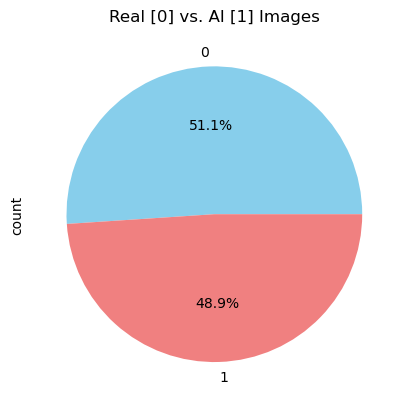

In [60]:
# Make a pie chart to show data set distribution of real vs. AI
pie_ai.plot.pie(
autopct='%1.1f%%', 
colors=['skyblue', 'lightcoral']) 
plt.title('Real [0] vs. AI [1] Images'  
)

In [67]:
# Calculate the Real mean of 'conf_1'
real_mean_conf_1 = df_merged[df_merged['label'] == 0]['conf_1'].mean()
print(real_mean_conf_1)

0.38533384


In [68]:
# Calculate the AI mean of 'conf_1'
ai_mean_conf_1 = df_merged[df_merged['label'] == 1]['conf_1'].mean()
print(ai_mean_conf_1)

0.43459937


In [69]:
# Calculate the Real mean of 'conf_2'
real_mean_conf_2 = df_merged[df_merged['label'] == 0]['conf_2'].mean()
print(real_mean_conf_2)

0.12926145


In [71]:
# Calculate the AI mean of 'conf_2'
ai_mean_conf_2 = df_merged[df_merged['label'] == 1]['conf_2'].mean()
print(ai_mean_conf_2)

0.13199218


In [70]:
# Calculate the Real mean of 'conf_3'
real_mean_conf_3 = df_merged[df_merged['label'] == 0]['conf_3'].mean()
print(real_mean_conf_3)

0.07029259


In [72]:
# Calculate the AI mean of 'conf_3'
ai_mean_conf_3 = df_merged[df_merged['label'] == 1]['conf_3'].mean()
print(ai_mean_conf_3)

0.06851405


In [75]:
prediction_confidence = pd.DataFrame(
    {'Scenarios': ["REAL Conf 1", "AI Conf 1", "REAL Conf 2", "AI Conf 2", "REAL Conf 3", "AI Conf 3"], 
     'Predicted Confidence': [real_mean_conf_1, ai_mean_conf_1, real_mean_conf_2, ai_mean_conf_2, real_mean_conf_3,ai_mean_conf_3]}
)
prediction_confidence

Scenarios  Predicted Confidence
0  REAL Conf 1              0.385334
1    AI Conf 1              0.434599
2  REAL Conf 2              0.129261
3    AI Conf 2              0.131992
4  REAL Conf 3              0.070293
5    AI Conf 3              0.068514

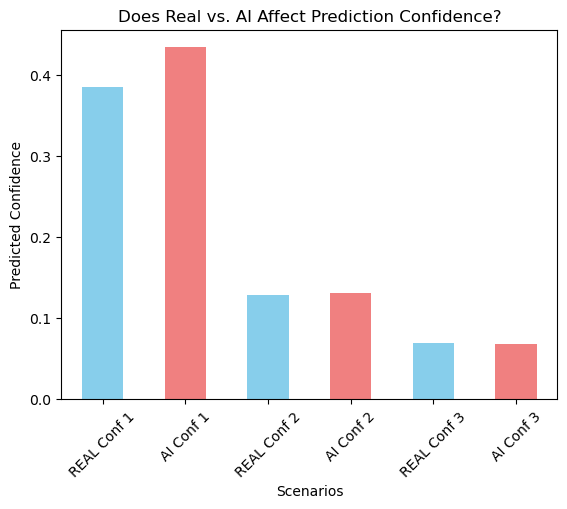

In [82]:
bar_chart = prediction_confidence.plot.bar(
    x='Scenarios',
    y='Predicted Confidence',
    color=['skyblue', 'lightcoral'],
    legend=False
)

plt.title('Does Real vs. AI Affect Prediction Confidence?')
plt.xlabel('Scenarios')
plt.ylabel('Predicted Confidence')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

plt.show()

In [64]:
# Look up Real unique values
real_uniques = df_merged[df_merged['label'] == 0]['predict_1'].value_counts()
real_uniques.head()

predict_1
lab_coat    34
plate       23
jean        22
bikini      15
alp         14
Name: count, dtype: int64

In [65]:
# Look up AI unique values
ai_uniques = df_merged[df_merged['label'] == 1]['predict_1'].value_counts()
ai_uniques.head()

predict_1
lab_coat    28
rapeseed    21
wig         19
cucumber    14
maillot     14
Name: count, dtype: int64

In [83]:
real_lab_coats = df_merged.copy()

In [84]:
real_lab_coats = real_lab_coats[(real_lab_coats['predict_1'] == 'lab_coat') & (real_lab_coats['label'] == 0)]
real_lab_coats.head()

file_path predict_1    predict_2  \
9    ./Training_2000_Fixed/00a1c6c39f034eb689aa8304...  lab_coat        torch   
39   ./Training_2000_Fixed/00b7f1dacb1c4179af3af9f7...  lab_coat        altar   
143  ./Training_2000_Fixed/0a1688961e854238a9c39451...  lab_coat       pajama   
144  ./Training_2000_Fixed/0a16bb3f52d945c79d62eab3...  lab_coat        groom   
161  ./Training_2000_Fixed/0a21264c06d94403bcd5c737...  lab_coat  mortarboard   

       predict_3    conf_1    conf_2    conf_3  label  
9    stethoscope  0.539137  0.316153  0.065237      0  
39      vestment  0.175815  0.068553  0.052941      0  
143  trench_coat  0.240762  0.132318  0.086448      0  
144     notebook  0.126795  0.090187  0.079157      0  
161  bathing_cap  0.159553  0.073938  0.067757      0

In [102]:
# Calculate the Real mean of 'conf_1' for real_lab_coats
real_lab_coats_mean = real_lab_coats["conf_1"].mean()
print(real_lab_coats_mean)

0.35957035


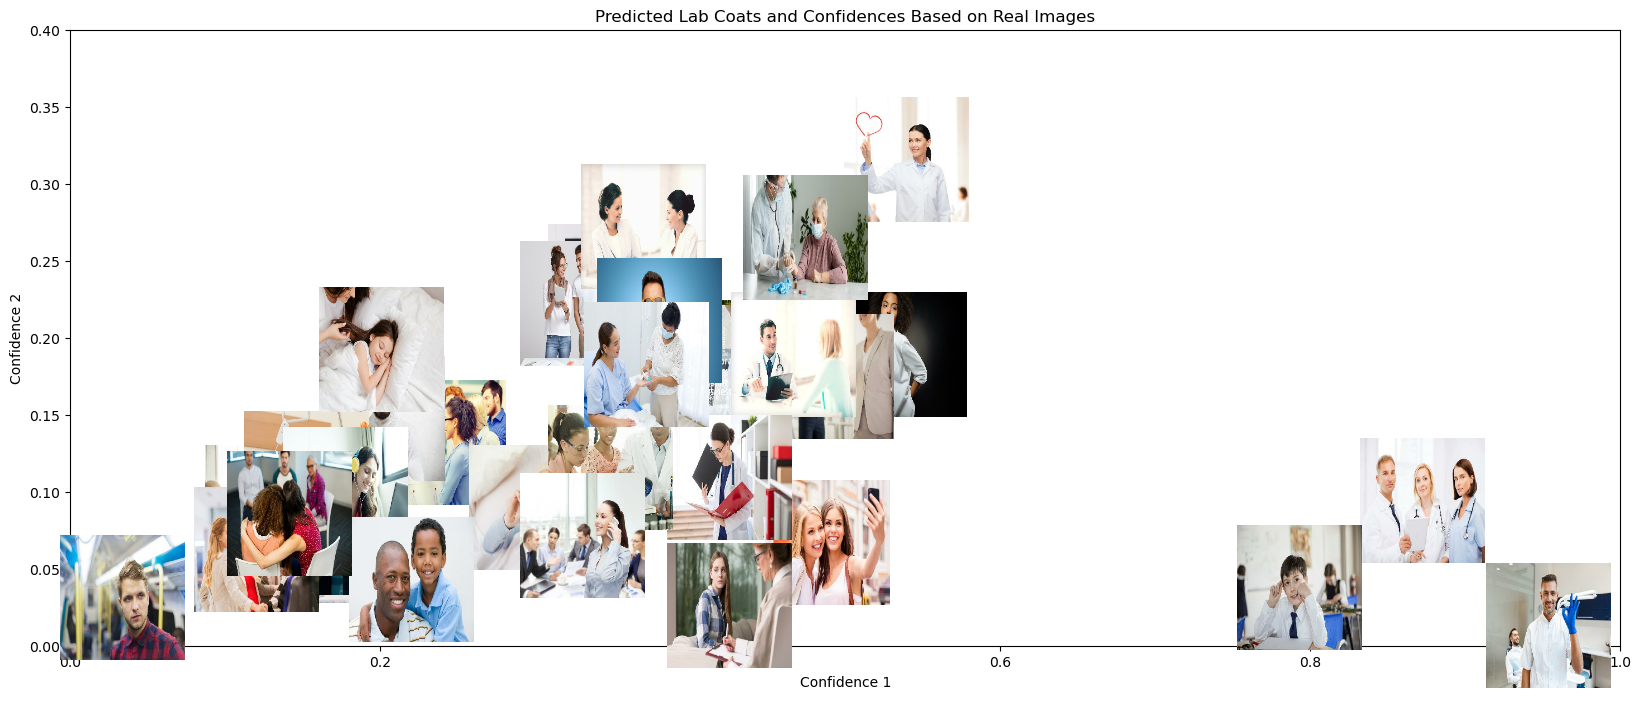

In [97]:
fig, ax = plt.subplots(figsize=(20, 8))

for index, row in real_lab_coats.iterrows():
    # Load the image
    img = plt.imread(row['file_path'])
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.4) # Adjust zoom for image size
    
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, (row['conf_1'], row['conf_2']), frameon=False)
    
    # Add the AnnotationBbox to the axes
    ax.add_artist(ab)

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, .4)
ax.set_xlabel("Confidence 1")
ax.set_ylabel("Confidence 2")
ax.set_title("Predicted Lab Coats and Confidences Based on Real Images")

plt.show()

In [98]:
ai_lab_coats = df_merged.copy()

In [99]:
ai_lab_coats = ai_lab_coats[(ai_lab_coats['predict_1'] == 'lab_coat') & (ai_lab_coats['label'] == 1)]
ai_lab_coats.head()

file_path predict_1    predict_2  \
40   ./Training_2000_Fixed/00b9268ae3b44af6a1022152...  lab_coat       pajama   
41   ./Training_2000_Fixed/00ba40640d1b45adbf3cf480...  lab_coat   hair_spray   
115  ./Training_2000_Fixed/00f9d3481eb14d30b0cee1b4...  lab_coat  trench_coat   
146  ./Training_2000_Fixed/0a1907342f66426f8c56aa4f...  lab_coat     notebook   
170  ./Training_2000_Fixed/0a27c89edcaf4b45b5e89423...  lab_coat    ice_lolly   

              predict_3    conf_1    conf_2    conf_3  label  
40                torch  0.886649  0.047301  0.010389      1  
41              cleaver  0.352837  0.058500  0.053724      1  
115               stole  0.248324  0.163263  0.073594      1  
146         pill_bottle  0.574651  0.055219  0.023068      1  
170  cellular_telephone  0.355535  0.271309  0.067677      1

In [103]:
# Calculate the Real mean of 'conf_1' for ai_lab_coats
ai_lab_coats_mean = ai_lab_coats["conf_1"].mean()
print(ai_lab_coats_mean)

0.54406536


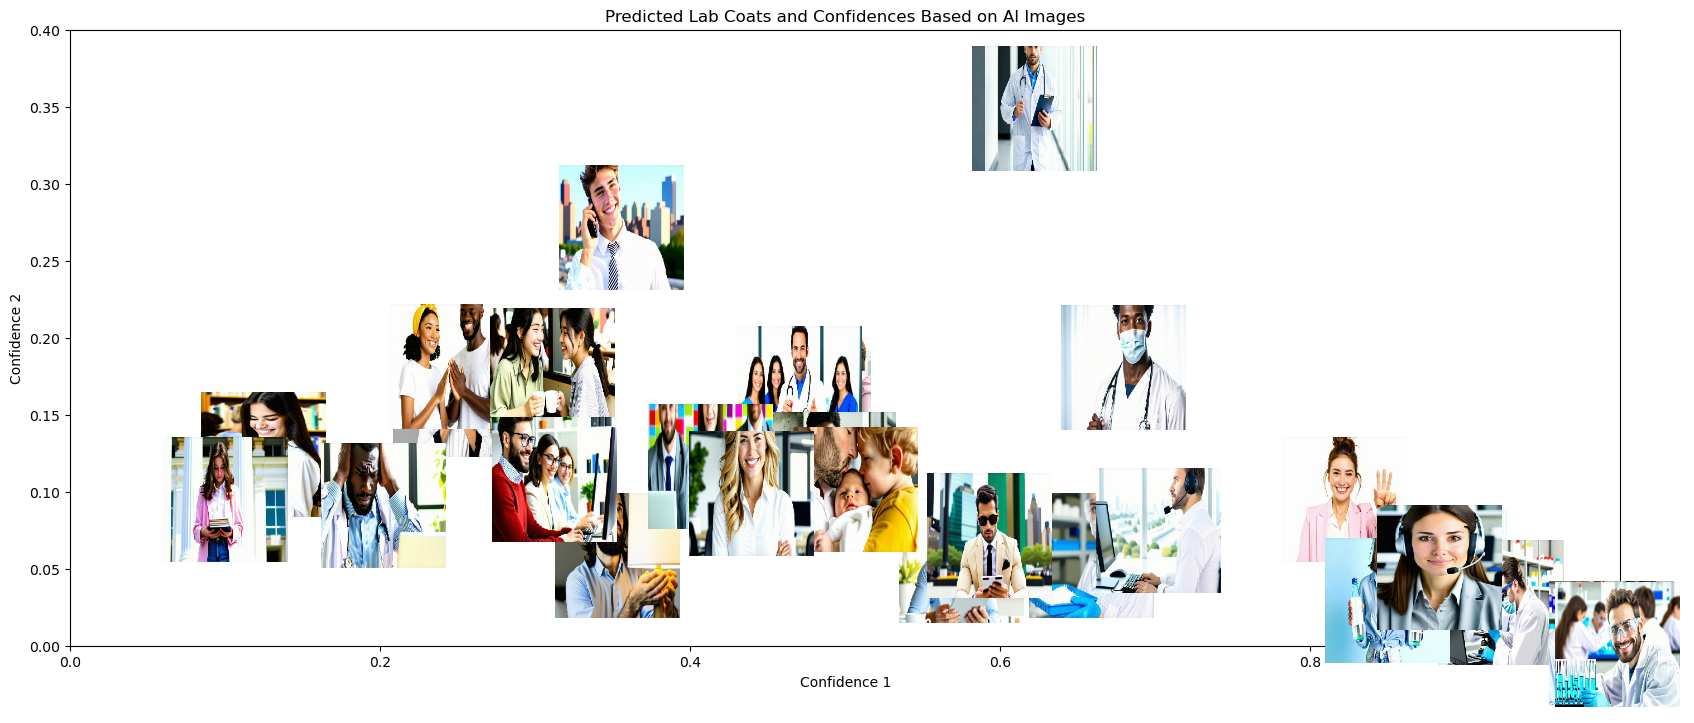

In [100]:
fig2, ax = plt.subplots(figsize=(20, 8))

for index, row in ai_lab_coats.iterrows():
    # Load the image
    img = plt.imread(row['file_path'])
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.4) # Adjust zoom for image size
    
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, (row['conf_1'], row['conf_2']), frameon=False)
    
    # Add the AnnotationBbox to the axes
    ax.add_artist(ab)

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, .4)
ax.set_xlabel("Confidence 1")
ax.set_ylabel("Confidence 2")
ax.set_title("Predicted Lab Coats and Confidences Based on AI Images")

plt.show()

In [110]:
# Look up AI counts for plate
ai_plate_uniques = df_merged[(df_merged['label'] == 1) & (df_merged['predict_1'] == "plate")]['predict_1'].value_counts()
ai_plate_uniques

predict_1
plate    14
Name: count, dtype: int64

In [111]:
real_plates = df_merged.copy()

In [112]:
real_plates = real_plates[(real_plates['predict_1'] == 'plate') & (real_plates['label'] == 0)]
real_plates.head()

file_path predict_1    predict_2  \
84   ./Training_2000_Fixed/00defa95df1d4f86be6da834...     plate    meat_loaf   
94   ./Training_2000_Fixed/00e4d33ef7b5480f985cd109...     plate  French_loaf   
130  ./Training_2000_Fixed/0a084c2f15f24a698c5a45d2...     plate    ice_cream   
142  ./Training_2000_Fixed/0a1341a673d24a0189ac4469...     plate    meat_loaf   
269  ./Training_2000_Fixed/0a63cdce05134268a6501b8c...     plate     cucumber   

          predict_3    conf_1    conf_2    conf_3  label  
84        ice_cream  0.843972  0.089287  0.012795      0  
94   Dungeness_crab  0.709904  0.024555  0.021260      0  
130       carbonara  0.763101  0.036714  0.028586      0  
142         hot_pot  0.260342  0.236847  0.137020      0  
269            tray  0.651986  0.222222  0.028824      0

In [113]:
# Calculate the Real mean of 'conf_1' for real_plates
real_plates_mean = real_plates["conf_1"].mean()
print(real_plates_mean)

0.555501


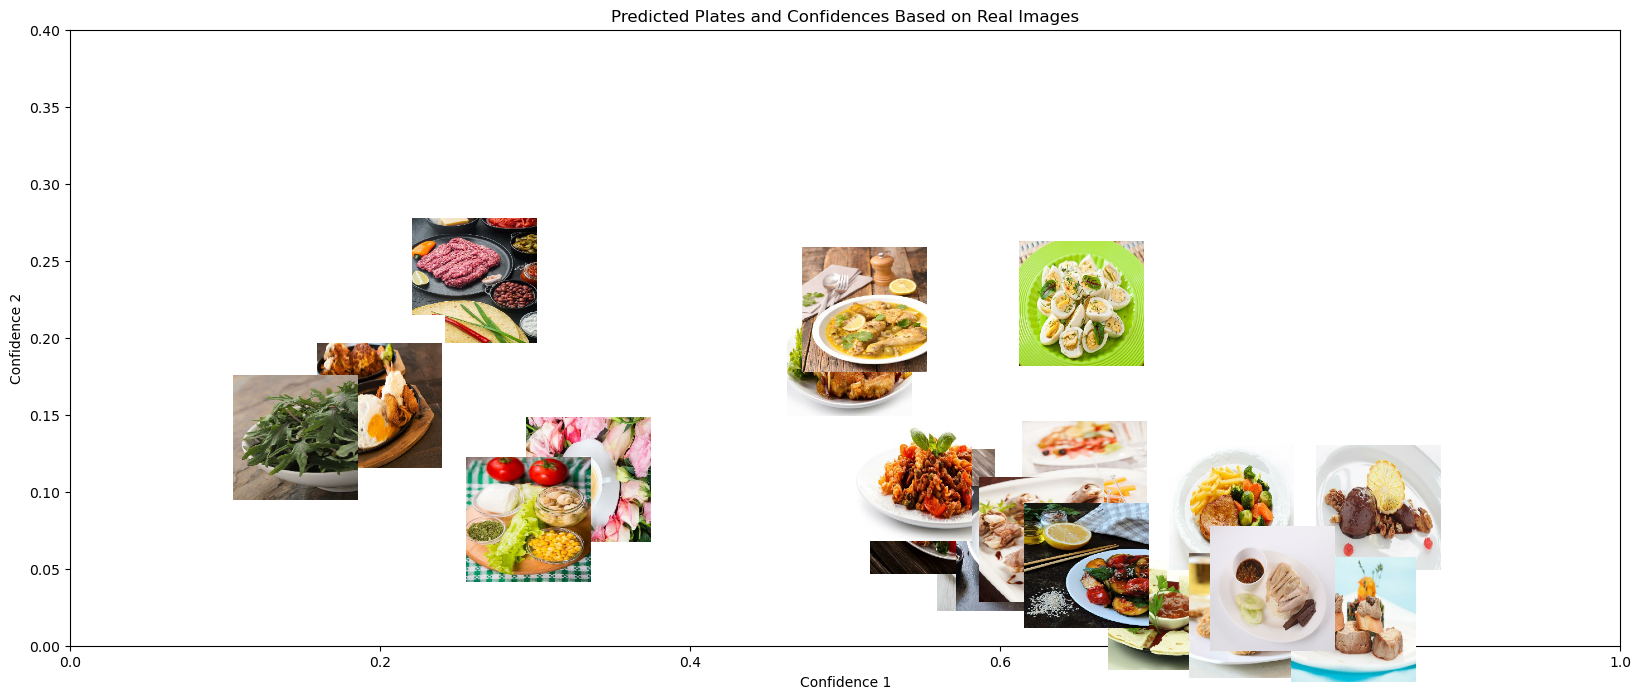

In [114]:
fig, ax = plt.subplots(figsize=(20, 8))

for index, row in real_plates.iterrows():
    # Load the image
    img = plt.imread(row['file_path'])
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.4) # Adjust zoom for image size
    
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, (row['conf_1'], row['conf_2']), frameon=False)
    
    # Add the AnnotationBbox to the axes
    ax.add_artist(ab)

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, .4)
ax.set_xlabel("Confidence 1")
ax.set_ylabel("Confidence 2")
ax.set_title("Predicted Plates and Confidences Based on Real Images")

plt.show()

In [115]:
ai_plates = df_merged.copy()

In [116]:
ai_plates = ai_plates[(ai_plates['predict_1'] == 'plate') & (ai_plates['label'] == 1)]
ai_plates.head()

file_path predict_1   predict_2  \
314  ./Training_2000_Fixed/0a826c64861e44609f6dd998...     plate      hotdog   
533  ./Training_2000_Fixed/0b2caf9f607842f9bcbb06c4...     plate        corn   
537  ./Training_2000_Fixed/0b301f8aa83545ceb1ca41fd...     plate   carbonara   
719  ./Training_2000_Fixed/0bb9794857ec4fa997db5ee3...     plate  restaurant   
746  ./Training_2000_Fixed/0bc93c564fdc4286810ac276...     plate    cucumber   

        predict_3    conf_1    conf_2    conf_3  label  
314      cucumber  0.246581  0.185921  0.100492      1  
533     carbonara  0.797933  0.022892  0.011702      1  
537          corn  0.786336  0.058221  0.029597      1  
719  dining_table  0.491145  0.200417  0.071471      1  
746          tray  0.851461  0.102097  0.009322      1

In [117]:
# Calculate the AI mean of 'conf_1' for ai_plates
ai_plates_mean = ai_plates["conf_1"].mean()
print(ai_plates_mean)

0.42448872


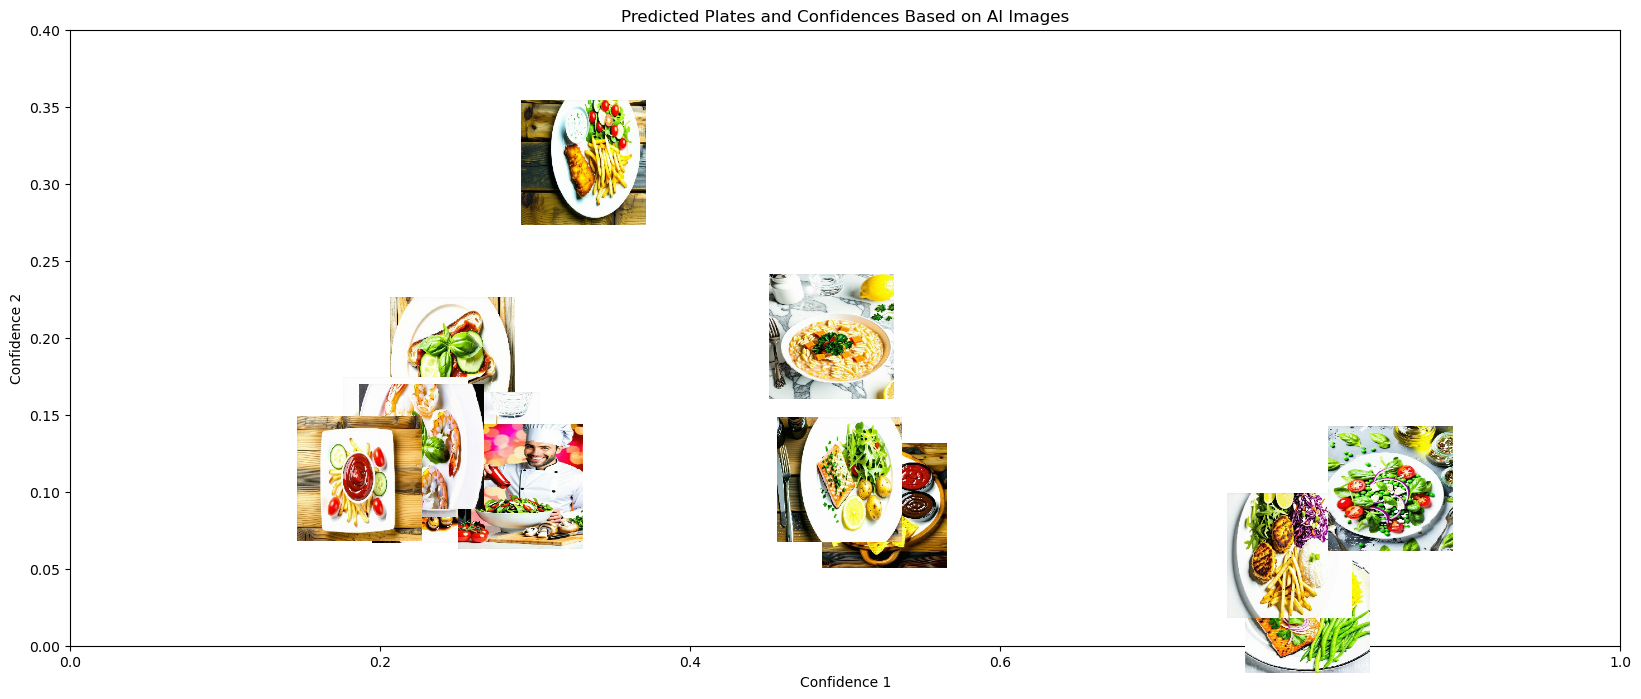

In [118]:
fig, ax = plt.subplots(figsize=(20, 8))

for index, row in ai_plates.iterrows():
    # Load the image
    img = plt.imread(row['file_path'])
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.4) # Adjust zoom for image size
    
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, (row['conf_1'], row['conf_2']), frameon=False)
    
    # Add the AnnotationBbox to the axes
    ax.add_artist(ab)

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, .4)
ax.set_xlabel("Confidence 1")
ax.set_ylabel("Confidence 2")
ax.set_title("Predicted Plates and Confidences Based on AI Images")

plt.show()

In [120]:
real_rapeseed = df_merged.copy()

In [121]:
# Look up real counts for rapeseed
real_rapeseed_uniques = real_rapeseed[(real_rapeseed['label'] == 0) & (real_rapeseed['predict_1'] == "rapeseed")]['predict_1'].value_counts()
real_rapeseed_uniques

predict_1
rapeseed    6
Name: count, dtype: int64

In [122]:
real_rapeseed = real_rapeseed[(real_rapeseed['predict_1'] == 'rapeseed') & (real_rapeseed['label'] == 0)]
real_rapeseed.head()

file_path predict_1   predict_2  \
639   ./Training_2000_Fixed/0b798b478b9940eea117732c...  rapeseed         hay   
649   ./Training_2000_Fixed/0b8352b5d80d4aa685759e76...  rapeseed        barn   
879   ./Training_2000_Fixed/0c3577e36a9e40ceacde6d8c...  rapeseed        jean   
928   ./Training_2000_Fixed/0c5432c983894101bd922c42...  rapeseed         hay   
1057  ./Training_2000_Fixed/0cb2cdf2342d4b8ea0ca2b9d...  rapeseed  park_bench   

       predict_3    conf_1    conf_2    conf_3  label  
639         maze  0.254082  0.159024  0.150781      0  
649          hay  0.901427  0.020132  0.017087      0  
879         gown  0.135142  0.086330  0.049788      0  
928   worm_fence  0.792525  0.040792  0.018867      0  
1057      barrow  0.899415  0.038041  0.009838      0

In [123]:
# Calculate the Real mean of 'conf_1' for real_rapeseed
real_rapeseed_mean = real_rapeseed["conf_1"].mean()
print(real_rapeseed_mean)

0.53216106


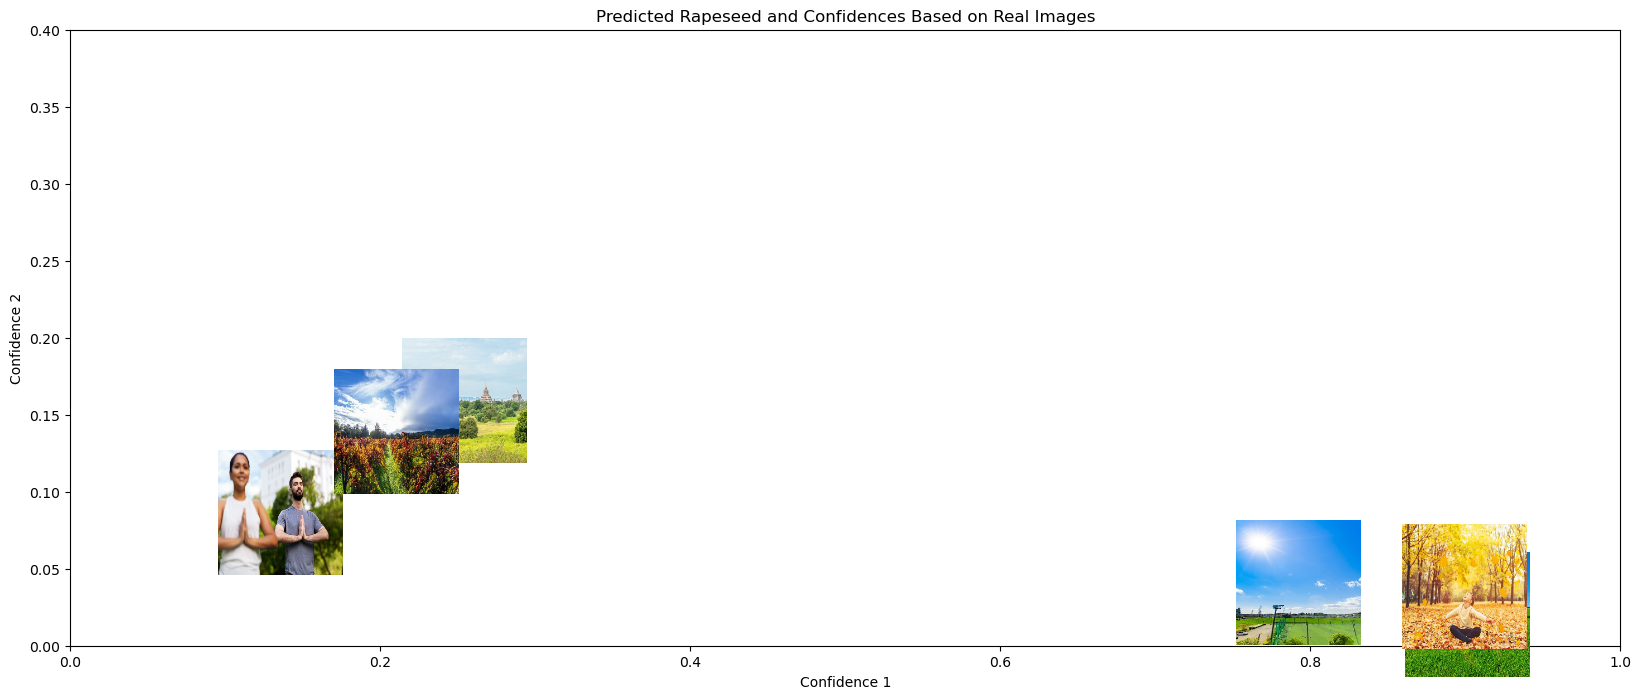

In [124]:
fig, ax = plt.subplots(figsize=(20, 8))

for index, row in real_rapeseed.iterrows():
    # Load the image
    img = plt.imread(row['file_path'])
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.4) # Adjust zoom for image size
    
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, (row['conf_1'], row['conf_2']), frameon=False)
    
    # Add the AnnotationBbox to the axes
    ax.add_artist(ab)

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, .4)
ax.set_xlabel("Confidence 1")
ax.set_ylabel("Confidence 2")
ax.set_title("Predicted Rapeseed and Confidences Based on Real Images")

plt.show()

In [125]:
ai_rapeseed = df_merged.copy()

In [126]:
ai_rapeseed = ai_rapeseed[(ai_rapeseed['predict_1'] == 'rapeseed') & (ai_rapeseed['label'] == 1)]
ai_rapeseed.head()

file_path predict_1    predict_2  \
33   ./Training_2000_Fixed/00b52dfbc4fb43bdac979392...  rapeseed     notebook   
224  ./Training_2000_Fixed/0a4ca1cea8404cfd864b0adf...  rapeseed   worm_fence   
293  ./Training_2000_Fixed/0a79f72b0fa044eb855856a4...  rapeseed     lakeside   
295  ./Training_2000_Fixed/0a7a68246c274ab7bf0299ef...  rapeseed  tennis_ball   
310  ./Training_2000_Fixed/0a814d7227ec4ff4ae613e09...  rapeseed          hay   

        predict_3    conf_1    conf_2    conf_3  label  
33   picket_fence  0.411336  0.096061  0.056451      1  
224          barn  0.999280  0.000175  0.000149      1  
293          barn  0.994520  0.000764  0.000729      1  
295     golf_ball  0.996543  0.001238  0.000971      1  
310      lakeside  0.246465  0.117543  0.085855      1

In [127]:
# Calculate the AI mean of 'conf_1' for ai_rapeseed
ai_rapeseed_mean = ai_rapeseed["conf_1"].mean()
print(ai_rapeseed_mean)

0.65849525


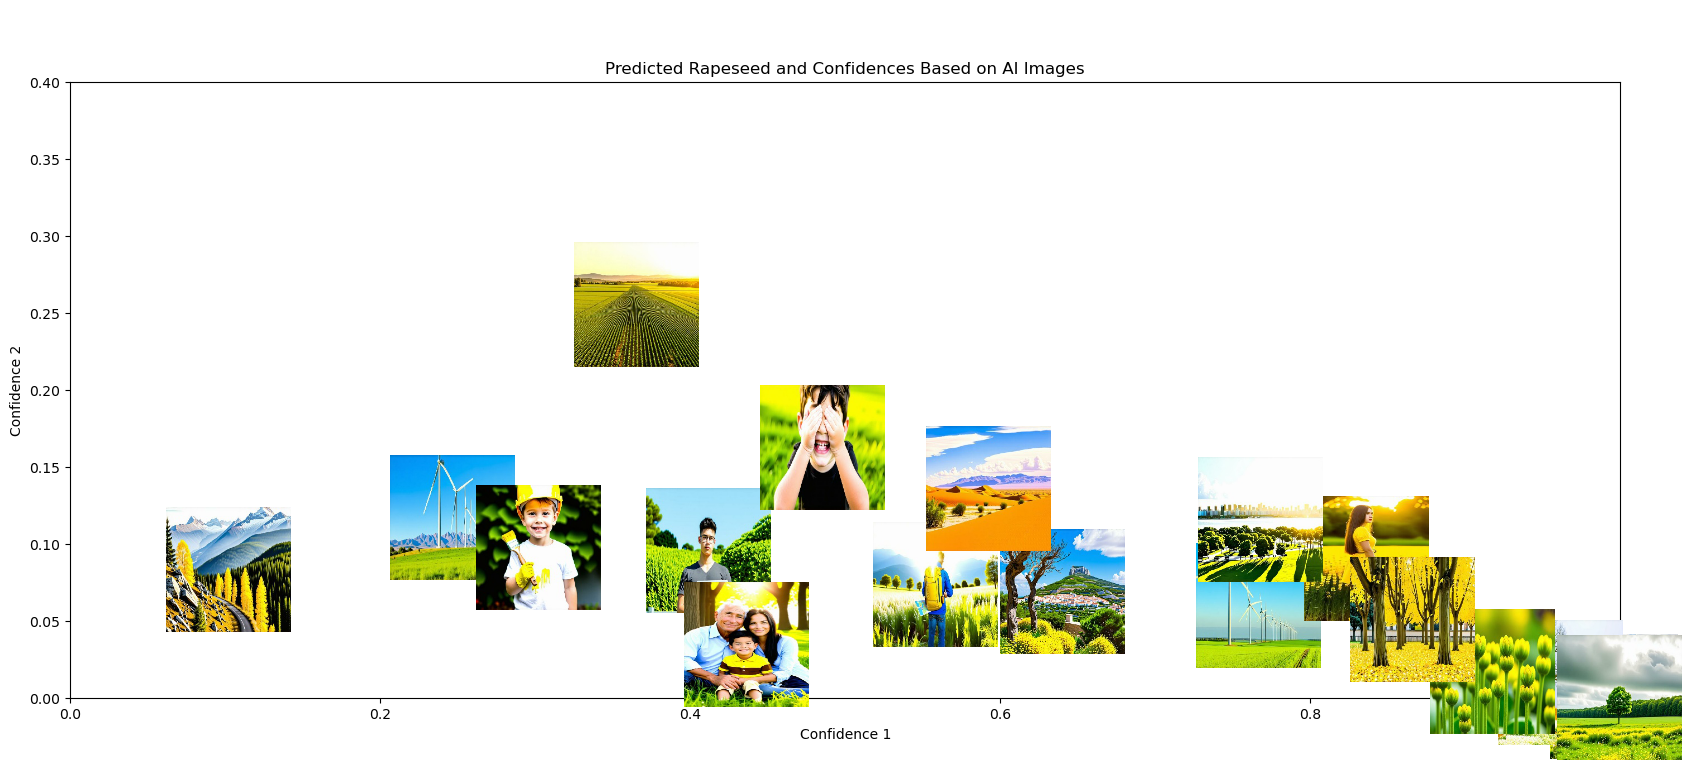

In [128]:
fig, ax = plt.subplots(figsize=(20, 8))

for index, row in ai_rapeseed.iterrows():
    # Load the image
    img = plt.imread(row['file_path'])
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.4) # Adjust zoom for image size
    
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, (row['conf_1'], row['conf_2']), frameon=False)
    
    # Add the AnnotationBbox to the axes
    ax.add_artist(ab)

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, .4)
ax.set_xlabel("Confidence 1")
ax.set_ylabel("Confidence 2")
ax.set_title("Predicted Rapeseed and Confidences Based on AI Images")

plt.show()